<center><h2> UNIFACISA - MACHINE LEARNING </h2><h3> Aluna: Aline Souza </center>
    

In [8]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split # para separação dos conjuntos de treino e teste
from sklearn.linear_model import LogisticRegression # para construção do modelo de Regressão Logística
from sklearn import metrics # para computação das métricas de avaliação
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from scipy import interp
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import seaborn as sn # para visualização dos resultados

In [9]:
base = pd.read_csv('titanic3.csv')

In [10]:
base

pclass  survived                                               name  \
0          1         1                      Allen, Miss. Elisabeth Walton   
1          1         1                     Allison, Master. Hudson Trevor   
2          1         0                       Allison, Miss. Helen Loraine   
3          1         0               Allison, Mr. Hudson Joshua Creighton   
4          1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5          1         1                                Anderson, Mr. Harry   
6          1         1                  Andrews, Miss. Kornelia Theodosia   
7          1         0                             Andrews, Mr. Thomas Jr   
8          1         1      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9          1         0                            Artagaveytia, Mr. Ramon   
10         1         0                             Astor, Col. John Jacob   
11         1         1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   
12         1         1                      Aubart, Mme. Leontine Pauline   
13         1         1                       Barber, Miss. Ellen "Nellie"   
14         1         1               Barkworth, Mr. Algernon Henry Wilson   
15         1         0                                Baumann, Mr. John D   
16         1         0                           Baxter, Mr. Quigg Edmond   
17         1         1    Baxter, Mrs. James (Helene DeLaudeniere Chaput)   
18         1         1                              Bazzani, Miss. Albina   
19         1         0                               Beattie, Mr. Thomson   
20         1         1                      Beckwith, Mr. Richard Leonard   
21         1         1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
22         1         1                              Behr, Mr. Karl Howell   
23         1         1                              Bidois, Miss. Rosalie   
24         1         1                                  Bird, Miss. Ellen   
25         1         0                                Birnbaum, Mr. Jakob   
26         1         1                            Bishop, Mr. Dickinson H   
27         1         1            Bishop, Mrs. Dickinson H (Helen Walton)   
28         1         1                             Bissette, Miss. Amelia   
29         1         1          Bjornstrom-Steffansson, Mr. Mauritz Hakan   
...      ...       ...                                                ...   
1279       3         0               Vestrom, Miss. Hulda Amanda Adolfina   
1280       3         0                                    Vovk, Mr. Janko   
1281       3         0                               Waelens, Mr. Achille   
1282       3         0                                Ware, Mr. Frederick   
1283       3         0                        Warren, Mr. Charles William   
1284       3         0                                  Webber, Mr. James   
1285       3         0                                Wenzel, Mr. Linhart   
1286       3         1    Whabee, Mrs. George Joseph (Shawneene Abi-Saab)   
1287       3         0                   Widegren, Mr. Carl/Charles Peter   
1288       3         0                          Wiklund, Mr. Jakob Alfred   
1289       3         0                            Wiklund, Mr. Karl Johan   
1290       3         1                   Wilkes, Mrs. James (Ellen Needs)   
1291       3         0                   Willer, Mr. Aaron ("Abi Weller")   
1292       3         0                                 Willey, Mr. Edward   
1293       3         0                  Williams, Mr. Howard Hugh "Harry"   
1294       3         0                               Williams, Mr. Leslie   
1295       3         0                                Windelov, Mr. Einar   
1296       3         0                                   Wirz, Mr. Albert   
1297       3         0                             Wiseman, Mr. Phillippe   
1298       3         0                          Wittevrongel, Mr. Camille   
12

In [11]:
base.info()
#informação da base antes da imputação de valores faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 107.4+ KB


In [12]:
base.shape

(1309, 14)

In [13]:
base.isnull().sum()

#sumarização para descoberta de quais são os valores e as colunas com valores faltantes

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [14]:
base.corr()
#correlação das variáveis antes da imputação de dados 

pclass  survived       age     sibsp     parch      fare      body
pclass    1.000000 -0.312469 -0.408106  0.060832  0.018322 -0.558629 -0.034642
survived -0.312469  1.000000 -0.055512 -0.027825  0.082660  0.244265       NaN
age      -0.408106 -0.055512  1.000000 -0.243699 -0.150917  0.178740  0.058809
sibsp     0.060832 -0.027825 -0.243699  1.000000  0.373587  0.160238 -0.099961
parch     0.018322  0.082660 -0.150917  0.373587  1.000000  0.221539  0.051099
fare     -0.558629  0.244265  0.178740  0.160238  0.221539  1.000000 -0.043110
body     -0.034642       NaN  0.058809 -0.099961  0.051099 -0.043110  1.000000

In [15]:
base.describe()
#descrição dos dados 

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881138     0.498854     0.385027   
std       0.837836     0.486055    14.413493     1.041658     0.865560   
min       1.000000     0.000000     0.170000     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000

In [16]:
#imputação de valores faltantes com pandas (médias)

In [17]:
base_imputer = base.fillna(base.mean())

#imputação das médias nos valores faltantes

In [18]:
print(base_imputer.isnull().sum())

#Sumarização da base com os valores faltantes incluidos 

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        2
boat          823
body            0
home.dest     564
dtype: int64


In [19]:
#exclusão das colunas que não interessam no DataFrame pata o resultado final
#remoção das colunas com dados faltantes e que não interessam para o resultado final

In [20]:
dados = base_imputer.drop(columns= ['cabin', 'embarked', 'boat', 'home.dest', 'name', 'ticket'])
dados.head()

#Exclusão dos dados que não considero relevantes para reprodução dos algoritimos 

pclass  survived     sex    age  sibsp  parch      fare        body
0       1         1  female  29.00      0      0  211.3375  160.809917
1       1         1    male   0.92      1      2  151.5500  160.809917
2       1         0  female   2.00      1      2  151.5500  160.809917
3       1         0    male  30.00      1      2  151.5500  135.000000
4       1         0  female  25.00      1      2  151.5500  160.809917

In [21]:
#Transformação de variavel categórica em numérica

In [22]:
dados['sex'] = pd.get_dummies(dados['sex'])

#transformação da variável sexo em numérica

In [23]:
dados['pclass'] = pd.get_dummies(dados['pclass'])

#transformação da variável Classe em numérica

In [24]:
dados.head()

pclass  survived  sex    age  sibsp  parch      fare        body
0       1         1    1  29.00      0      0  211.3375  160.809917
1       1         1    0   0.92      1      2  151.5500  160.809917
2       1         0    1   2.00      1      2  151.5500  160.809917
3       1         0    0  30.00      1      2  151.5500  135.000000
4       1         0    1  25.00      1      2  151.5500  160.809917

In [25]:
dados.info()

#informação dos dados depois de imputados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1309 non-null uint8
survived    1309 non-null int64
sex         1309 non-null uint8
age         1309 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null float64
body        1309 non-null float64
dtypes: float64(3), int64(3), uint8(2)
memory usage: 64.0 KB


In [26]:
dados.describe()

#descrição após o tratamento dos dados 

pclass     survived          sex          age        sibsp  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean      0.246753     0.381971     0.355997    29.881138     0.498854   
std       0.431287     0.486055     0.478997    12.883193     1.041658   
min       0.000000     0.000000     0.000000     0.170000     0.000000   
25%       0.000000     0.000000     0.000000    22.000000     0.000000   
50%       0.000000     0.000000     0.000000    29.881138     0.000000   
75%       0.000000     1.000000     1.000000    35.000000     1.000000   
max       1.000000     1.000000     1.000000    80.000000     8.000000   

             parch         fare         body  
count  1309.000000  1309.000000  1309.000000  
mean      0.385027    33.295479   160.809917  
std       0.865560    51.738879    29.591544  
min       0.000000     0.000000     1.000000  
25%       0.000000     7.895800   160.809917  
50%       0.000000    14.454200   160.809917  
75%       0.000000    31.275000   160.809917  
max       9.000000   512.329200   328.000000

In [27]:
dados.corr()

#Correlação das variáveis

pclass      survived       sex       age     sibsp     parch  \
pclass    1.000000  2.794486e-01  0.107371  0.362587 -0.034256 -0.013033   
survived  0.279449  1.000000e+00  0.528693 -0.050198 -0.027825  0.082660   
sex       0.107371  5.286931e-01  1.000000 -0.057397  0.109609  0.213125   
age       0.362587 -5.019836e-02 -0.057397  1.000000 -0.190747 -0.130872   
sibsp    -0.034256 -2.782512e-02  0.109609 -0.190747  1.000000  0.373587   
parch    -0.013033  8.265957e-02  0.213125 -0.130872  0.373587  1.000000   
fare      0.599956  2.442078e-01  0.185484  0.171521  0.160224  0.221522   
body      0.004232  1.912936e-16  0.002509  0.019642 -0.025919  0.015177   

              fare          body  
pclass    0.599956  4.232418e-03  
survived  0.244208  1.912936e-16  
sex       0.185484  2.509213e-03  
age       0.171521  1.964240e-02  
sibsp     0.160224 -2.591925e-02  
parch     0.221522  1.517702e-02  
fare      1.000000 -1.058336e-02  
body     -0.010583  1.000000e+00

In [28]:
classe = dados.loc[ : , 'survived']
previsores= dados.loc[ : , ['pclass', 'age', 'sibsp', 'parch', 'fare', 'body', 'sex']]

#Divisão do dataset e definição dos preditores e classe

# Regressão Logística

In [29]:
# Divisão dos conjuntos de treino e teste

previsores_treino, previsores_teste, classe_treino, classe_teste = train_test_split(previsores, classe, test_size=0.30, random_state=0)

In [30]:
# Instancia o modelo de regressão logística com parâmetros default
modelo_reglog = LogisticRegression(solver= 'lbfgs')

# Treina o modelo com base nos preditores e variável alvo
modelo_reglog.fit(previsores_treino, classe_treino)

# Prevê, para os dados do conjunto de teste, resultados para a variável alvo
classe_pred = modelo_reglog.predict(previsores_teste)

C:\Users\aline\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [31]:
# Matriz de confusão
print(confusion_matrix(classe_teste, classe_pred))

[[212  34]
 [ 47 100]]


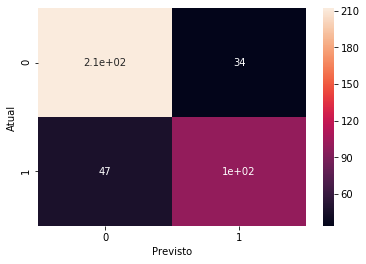

In [32]:
matriz_confusao = pd.crosstab(classe_teste, classe_pred, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao, annot=True)

In [33]:
# Acurácia do modelo
print('Acurácia: ', metrics.accuracy_score(classe_teste, classe_pred))

Acurácia:  0.7938931297709924


In [34]:
print('Precisão: ', metrics.precision_score(classe_teste, classe_pred))
print('Revocação: ', metrics.recall_score(classe_teste, classe_pred))
print('F1-Measure: ', metrics.f1_score(classe_teste, classe_pred))
print('ROC AUC: ', metrics.roc_auc_score(classe_teste, classe_pred))

Precisão:  0.746268656716418
Revocação:  0.6802721088435374
F1-Measure:  0.7117437722419929
ROC AUC:  0.7710303633648581


In [35]:
print(classe_teste)
print(classe_pred)

1139    0
533     1
459     0
1150    0
393     0
1189    1
5       1
231     1
330     0
887     1
531     0
790     0
427     1
1260    1
251     1
486     0
436     1
31      1
186     1
1051    0
769     0
642     0
1087    0
55      1
678     0
358     1
503     1
995     0
1005    0
1279    0
       ..
1157    0
936     1
467     1
97      1
1003    1
1253    0
1140    0
196     1
883     0
183     1
1270    0
431     0
526     1
815     0
933     0
1206    0
175     0
1292    0
81      0
267     0
77      0
1225    0
452     1
895     1
900     0
914     0
580     1
1080    1
1249    0
88      1
Name: survived, Length: 393, dtype: int64
[0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0
 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0

In [36]:
# Só pra conferir:

# A predição foi feita para os seguintes registros:
print(previsores_teste) 

# Que possuíam a seguinte classificação:
print(classe_teste)

# E Que obtiveram o seguinte resultado do modelo:
print(classe_pred)

      pclass        age  sibsp  parch        fare        body  sex
1139       0  38.000000      0      0    7.895800  160.809917    0
533        0  21.000000      0      1   21.000000  160.809917    1
459        0  42.000000      1      0   27.000000  160.809917    0
1150       0  29.881138      0      0   14.500000  160.809917    0
393        0  25.000000      0      0   31.500000  160.809917    0
1189       0   4.000000      1      1   16.700000  160.809917    1
5          1  48.000000      0      0   26.550000  160.809917    0
231        1  52.000000      0      0   30.500000  160.809917    0
330        0  57.000000      0      0   13.000000  160.809917    0
887        0  29.881138      0      0    8.112500  160.809917    0
531        0  29.881138      0      0   15.050000  160.809917    0
790        0  39.000000      0      2    7.229200  160.809917    0
427        0   0.670000      1      1   14.500000  160.809917    0
1260       0  18.000000      0      0    9.841700  160.809917 

# Árvore de Decisão

In [37]:
print("Preditores Treino")
print(previsores_treino)

print("Preditores Teste")
print(previsores_teste)

print("Alvo Treino")
print(classe_treino)

print("Alvo Teste")
print(classe_teste)

Preditores Treino
      pclass        age  sibsp  parch      fare        body  sex
501        0  13.000000      0      1   19.5000  160.809917    1
588        0   4.000000      1      1   23.0000  160.809917    1
402        0  30.000000      1      0   13.8583  160.809917    1
1193       0  29.881138      0      0    7.7250  160.809917    0
686        0  22.000000      0      0    7.7250  160.809917    1
971        0  29.881138      0      0    7.8792  160.809917    0
117        1  30.000000      0      0   56.9292  160.809917    1
540        0   2.000000      1      1   26.0000  160.809917    1
294        1  49.000000      1      1  110.8833  160.809917    0
261        1  35.000000      0      0   26.2875  160.809917    0
587        0   2.000000      1      1   23.0000  160.809917    0
489        0  42.000000      1      0   26.0000  160.809917    1
2          1   2.000000      1      2  151.5500  160.809917    1
405        0  18.000000      0      0   13.0000  160.809917    0
1284   

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
# Cria uma instância default
dt = DecisionTreeClassifier()

# Treina o modelo com os dados dos alunos
arvore_decisao = dt.fit(previsores_treino, classe_treino)

In [40]:
# Realiza a previsão nos dados de teste
arvore_previsao = arvore_decisao.predict(previsores_teste)

In [41]:
print("Acurácia: ", metrics.accuracy_score(classe_teste, arvore_previsao))
print('Precisão: ', metrics.precision_score(classe_teste, arvore_previsao))
print('Revocação: ', metrics.recall_score(classe_teste, arvore_previsao))
print('F1-Measure: ', metrics.f1_score(classe_teste, arvore_previsao))
print('ROC AUC: ', metrics.roc_auc_score(classe_teste, arvore_previsao))

Acurácia:  0.7709923664122137
Precisão:  0.7111111111111111
Revocação:  0.6530612244897959
F1-Measure:  0.6808510638297872
ROC AUC:  0.747262319561971


[[207  39]
 [ 51  96]]


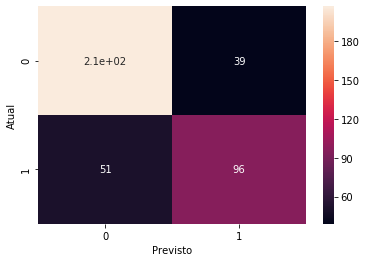

In [42]:
# Matriz de Confusão
print(confusion_matrix(classe_teste, arvore_previsao))
matriz_confusao_arvore = pd.crosstab(classe_teste, arvore_previsao, rownames=['Atual'], colnames=['Previsto'])
# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao_arvore, annot=True)

# Floresta Aleatória

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
# Instanciao objeto da Floresta Aleatória e define o número de árvores a serem utilizadas
floresta = RandomForestClassifier(n_estimators=2000)

# x_train, x_test, y_train, y_test

# Treinamento do modelo
floresta.fit(previsores_treino, classe_treino)

# Prevê a partir dos preditores de testes
floresta_predicted = floresta.predict(previsores_teste)
floresta_predicted

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,

In [97]:
print("Acurácia: ", metrics.accuracy_score(classe_teste, floresta_predicted))
print('Precisão: ', metrics.precision_score(classe_teste, floresta_predicted))
print('Revocação: ', metrics.recall_score(classe_teste, floresta_predicted))
print('F1-Measure: ', metrics.f1_score(classe_teste, floresta_predicted))
print('ROC AUC: ', metrics.roc_auc_score(classe_teste, floresta_predicted))

Acurácia:  0.7862595419847328
Precisão:  0.7333333333333333
Revocação:  0.673469387755102
F1-Measure:  0.702127659574468
ROC AUC:  0.7635639621702339


[[210  36]
 [ 48  99]]


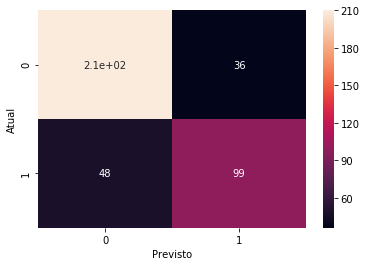

In [98]:
# Matriz de Confusão
print(confusion_matrix(classe_teste, floresta_predicted))
matriz_confusao_floresta = pd.crosstab(classe_teste, floresta_predicted, rownames=['Atual'], colnames=['Previsto'])
# Gera o gráfico da matriz de confusão
sn.heatmap(matriz_confusao_floresta, annot=True)

# Grafico comparando a métrica

In [99]:
print('ROC AUC: ', metrics.roc_auc_score(classe_teste, predicted))
print('ROC AUC1: ', metrics.roc_auc_score(classe_teste, arvore_previsao))
print('ROC AUC2: ', metrics.roc_auc_score(classe_teste, floresta_predicted))

ROC AUC:  0.7594989215198275
ROC AUC1:  0.747262319561971
ROC AUC2:  0.7635639621702339


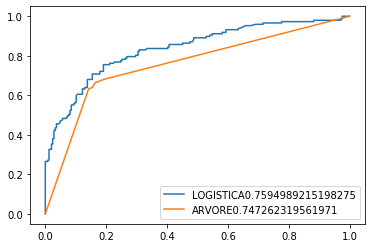

In [103]:
y_pred_log = modelo_reglog.predict_proba(previsores_teste)[::,1]
y_pred_arvore = dt.predict_proba(previsores_teste)[::,1]



fpr, tpr, label = metrics.roc_curve(classe_teste,  y_pred_log)
fpr1, tpr1, label = metrics.roc_curve(classe_teste,  y_pred_arvore)




auc = metrics.roc_auc_score(classe_teste, predicted)
auc1 = metrics.roc_auc_score(classe_teste, arvore_previsao)




plt.plot(fpr,tpr, label="LOGISTICA"+str(auc))
plt.plot(fpr1,tpr1, label="ARVORE"+str(auc1))
plt.legend(loc=4)
plt.show()

#Neste modelo o que mais se sai melhor é a REGRESSÃO LOGISTICA

In [107]:
y_pred_floresta = floresta.predict_proba(previsores_teste)

fpr2, tpr2, label = metrics.roc_auc_score(classe_teste, floresta_predicted)

auc2 =  metrics.roc_auc_score(classe_teste, floresta_predicted)

plt.plot(fpr2, tpr2, label= "FLORESTA"+str(auc2))
plt.legend(loc=4)
plt.show()

#não consegui plotar a floresta para comparar

TypeError: cannot unpack non-iterable numpy.float64 object